## Qué hay acá?

Tomando los datos de 1_intermediate-vectores-reduces.ipynb, se generan los clusters de los vectores de dimensión 3 y se visualiza con plotly.

In [27]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_excel('../data/0_raw/0_raw.xlsx')

df = df.drop_duplicates(subset=['texto-original'])
df = df['texto-original']

df.head()

0    Pobres #MasistasIgnorantes piensan que por and...
3    @DraInterleucina @LuisFerCamachoV @Elgobernado...
4    El tongo siempre fue maleante. Mandó a desvali...
5    Así justifica lo tan obvio 🙄como su supuesto a...
7                           @grupoeldeber #revocatongo
Name: texto-original, dtype: object

In [10]:
puntos = pd.read_json('../data/1_intermediate/1_intermediate-vectores-reducidos-pca.json', orient='records', lines=True)
print(puntos.shape)
puntos.head()

(36, 3)


,x,y,z
0,-0.919580,-0.824795,-0.407625
1,1.072242,0.122152,-0.375245
2,-1.941560,-1.431749,-0.816938
3,-1.109628,1.176379,0.033493
4,6.045797,-0.501563,0.545590


In [13]:
# create a new dataframe with puntos and df
df = pd.concat([df, puntos], axis=1)
df.head()

,texto-original,x,y,z
0,Pobres #MasistasIgnorantes piensan que por and...,-0.919580,-0.824795,-0.407625
3,@DraInterleucina @LuisFerCamachoV @Elgobernado...,-1.109628,1.176379,0.033493
4,El tongo siempre fue maleante. Mandó a desvali...,6.045797,-0.501563,0.545590
5,Así justifica lo tan obvio 🙄como su supuesto a...,3.762716,1.338456,-0.464555
7,@grupoeldeber #revocatongo,-2.330225,0.928893,-0.321064


In [20]:
# plot embedding in 3d
import plotly.express as px
#fig = px.scatter_3d(embedding, x=0, y=1, z=2, opacity=0.7)
# max length of text to show in hover 100 characters

df_trunc = df.copy()
df_trunc['texto-original'] = df_trunc['texto-original'].str.slice(0, 100)
fig = px.scatter_3d(df_trunc, x='x', y='y', z='z', opacity=0.7, hover_name='texto-original', template="plotly_dark")
fig.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 33
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   texto-original  36 non-null     object 
 1   x               36 non-null     float64
 2   y               36 non-null     float64
 3   z               36 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


In [23]:
X = df.iloc[:, 1:4].values
X.shape

(48, 3)

In [24]:
X

array([[-0.91958023, -0.82479472, -0.40762492],
       [-1.10962752,  1.17637914,  0.03349297],
       [ 6.04579712, -0.50156336,  0.54558972],
       [ 3.76271577,  1.33845616, -0.4645547 ],
       [-2.33022545,  0.92889345, -0.32106367],
       [-2.34453602,  1.61210057,  1.277348  ],
       [ 1.97590741, -2.44001544, -0.35116045],
       [-1.31498168, -0.46075273, -0.30133706],
       [-1.81884284,  0.50609748, -0.70906552],
       [-0.12264952, -4.29744074, -0.46533247],
       [ 0.52135281, -3.33102894, -0.71435999],
       [ 0.52620749,  5.45501199,  0.06461526],
       [ 4.40300086,  0.75799634, -0.78092112],
       [-0.19720256,  3.27287127,  0.14428525],
       [-2.30600067, -0.5562224 , -2.12558846],
       [ 1.44673083,  0.28411418, -0.32502532],
       [ 5.63465284,  0.1996087 ,  1.42448523],
       [-0.94095479, -2.38354159, -0.22817768],
       [-0.8788946 ,  4.97704455,  0.43492989],
       [-1.9330413 , -3.23318506, -1.40506598],
       [-1.7190471 ,  1.25102082,  1.422

In [28]:
# delete nans from X
X = X[~np.isnan(X).any(axis=1)]
X

array([[-0.91958023, -0.82479472, -0.40762492],
       [-1.10962752,  1.17637914,  0.03349297],
       [ 6.04579712, -0.50156336,  0.54558972],
       [ 3.76271577,  1.33845616, -0.4645547 ],
       [-2.33022545,  0.92889345, -0.32106367],
       [-2.34453602,  1.61210057,  1.277348  ],
       [ 1.97590741, -2.44001544, -0.35116045],
       [-1.31498168, -0.46075273, -0.30133706],
       [-1.81884284,  0.50609748, -0.70906552],
       [-0.12264952, -4.29744074, -0.46533247],
       [ 0.52135281, -3.33102894, -0.71435999],
       [ 0.52620749,  5.45501199,  0.06461526],
       [ 4.40300086,  0.75799634, -0.78092112],
       [-0.19720256,  3.27287127,  0.14428525],
       [-2.30600067, -0.5562224 , -2.12558846],
       [ 1.44673083,  0.28411418, -0.32502532],
       [ 5.63465284,  0.1996087 ,  1.42448523],
       [-0.94095479, -2.38354159, -0.22817768],
       [-0.8788946 ,  4.97704455,  0.43492989],
       [-1.9330413 , -3.23318506, -1.40506598],
       [-1.7190471 ,  1.25102082,  1.422

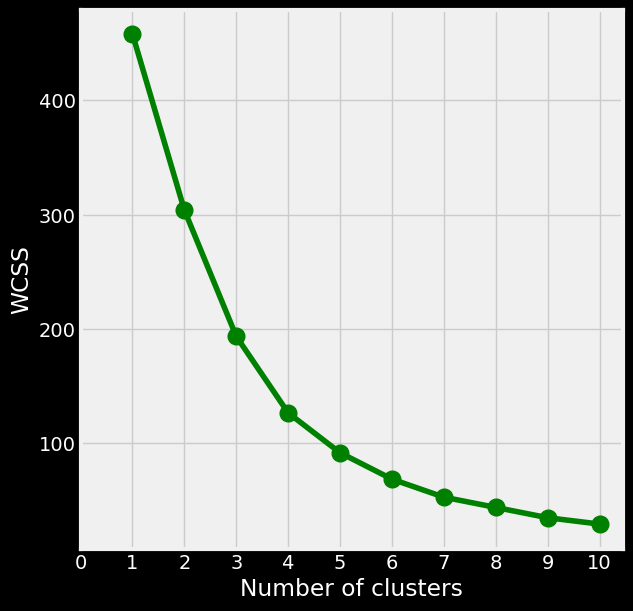

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))

plt.style.use('fivethirtyeight')
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [31]:
# default num of clusters is 5
Numclusters = 5
model = KMeans(n_clusters = Numclusters, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)

In [32]:
print(len(y_clusters))

36


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

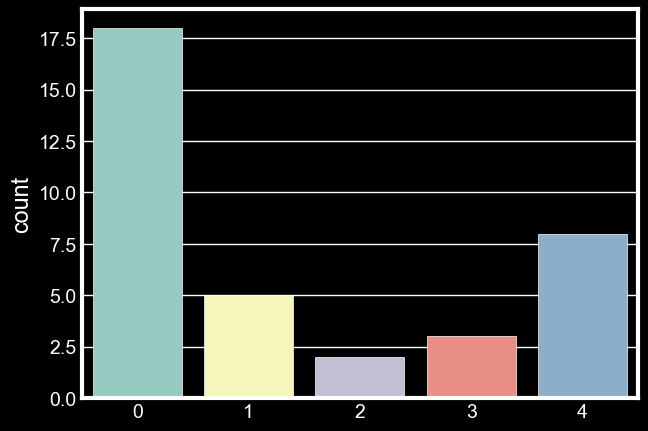

In [33]:
import seaborn as sns

# sns style black
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.style.use('dark_background')
sns.countplot(y_clusters)

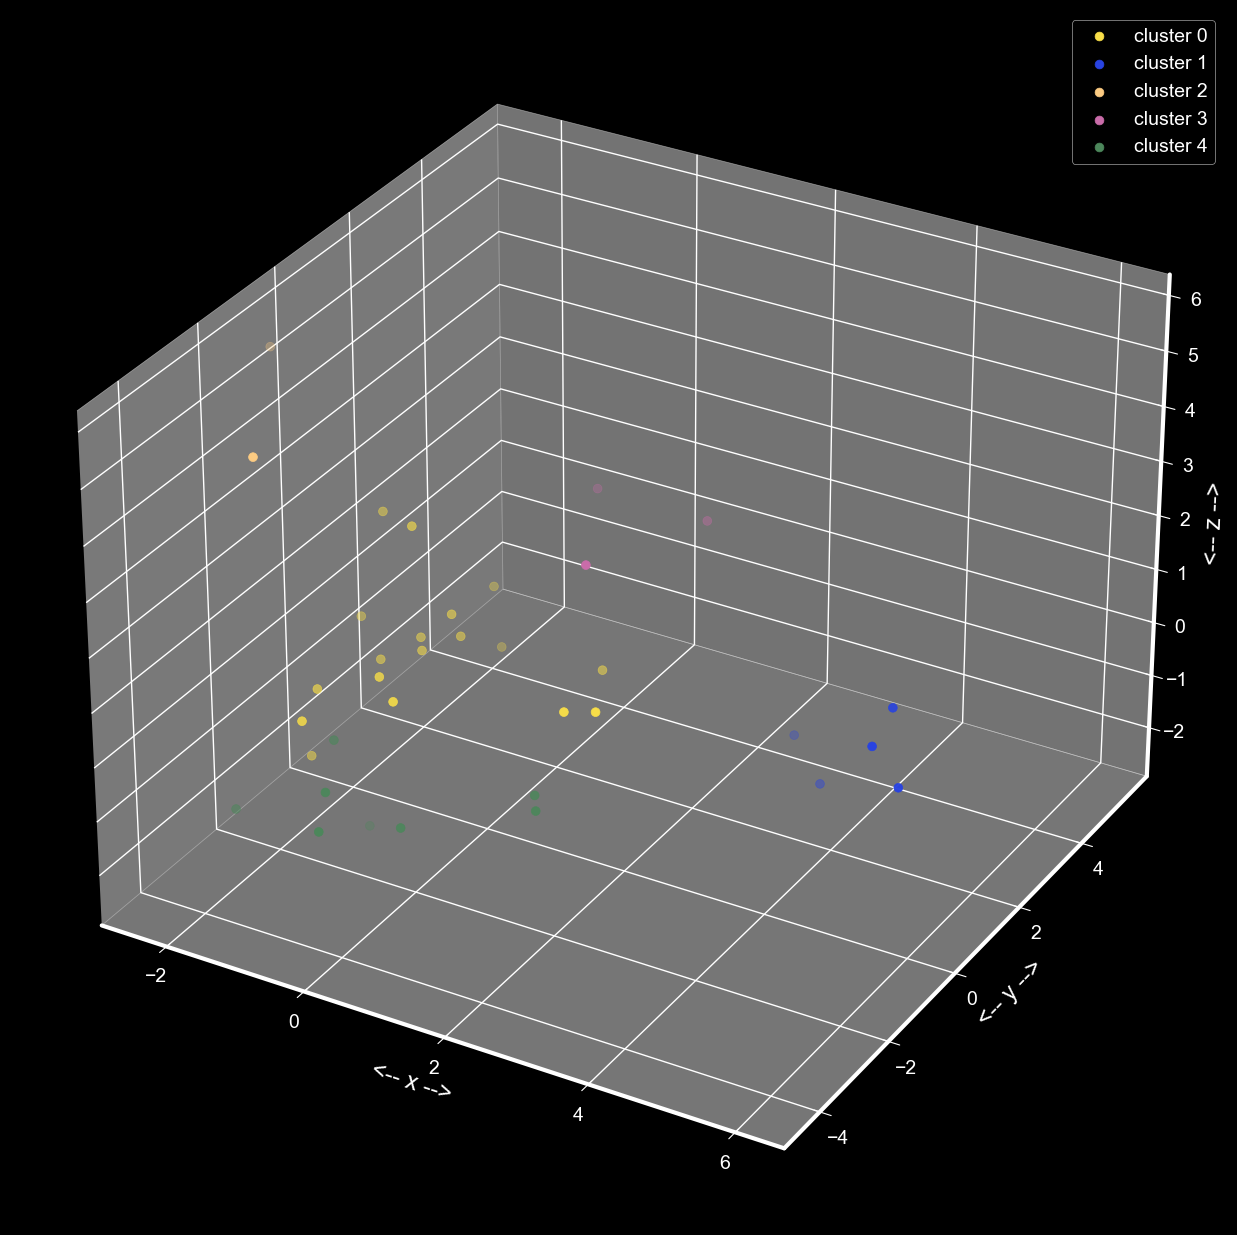

In [38]:
# matplotlib 3d import
#from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = '#d31e25', label = "cluster 0")
#ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = '#d7a32e', label = "cluster 1")
#ax.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = '#d1c02b', label = "cluster 2")
#ax.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#369e4b', label = "cluster 3")
#ax.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = '#5db5b7', label = "cluster 4")
#ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = '#31407b', label = "cluster 5")
#ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = '#8a3f64', label = "cluster 6")
#ax.scatter(X[y_clusters == 7,0],X[y_clusters == 7,1],X[y_clusters == 7,2], s = 40 , color = '#4f2e39', label = "cluster 7")
for i in range(Numclusters):
    ax.scatter(X[y_clusters == i,0],X[y_clusters == i,1],X[y_clusters == i,2], s = 40, color = '#{}'.format(''.join([random.choice('0123456789ABCDEF') for j in range(6)])), label = "cluster {}".format(i))
ax.set_xlabel('<-- x -->')
ax.set_ylabel('<-- y -->')
ax.set_zlabel('<-- z -->')
ax.legend()
plt.show()

In [39]:
import plotly.graph_objs as go

Scene = dict(xaxis = dict(title  = '<-- x -->'),yaxis = dict(title  = '<-- y -->'),zaxis = dict(title  = '<-- z -->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
# , hover_name="text"
labels = model.labels_
#trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10),opacity=0.8))
trace = go.Scatter3d(x=X[:, 0],
                     y=X[:, 1],
                     z=X[:, 2],
                     mode='markers',
                     # in text put first 50 characters of the tweet
                     text=df['texto-original'].str[:150],
                     marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10),opacity=0.8))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 1200,width = 1200, template="plotly_dark")
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [40]:
# export to html
fig.write_html("../reports/figures/3d-scatter-plot.html")

In [42]:
df.head()

,texto-original,x,y,z
0,Pobres #MasistasIgnorantes piensan que por and...,-0.919580,-0.824795,-0.407625
3,@DraInterleucina @LuisFerCamachoV @Elgobernado...,-1.109628,1.176379,0.033493
4,El tongo siempre fue maleante. Mandó a desvali...,6.045797,-0.501563,0.545590
5,Así justifica lo tan obvio 🙄como su supuesto a...,3.762716,1.338456,-0.464555
7,@grupoeldeber #revocatongo,-2.330225,0.928893,-0.321064


In [43]:
# export df to excel
df.to_excel("../data/2_processed/0_texto(sinrep)_puntos3d.xlsx")